In [87]:
!pip install opendatasets

In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Downloading Dataset

In [4]:
od.download('https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: murtuzab
Your Kaggle Key: ··········


100%|██████████| 178M/178M [00:00<00:00, 205MB/s]


In [5]:
raw_df = pd.read_csv('/content/online-payment-fraud-detection/onlinefraud.csv')

In [6]:
raw_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Data Exploration

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
raw_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Comparing Columns


In [9]:
raw_df['isFlaggedFraud']

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

In [10]:
raw_df['isFraud'] #It seems Target Column

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [11]:
raw_df.drop('isFlaggedFraud', axis=1, inplace=True) # Dropped the 'isFlaggedFraud' column.

In [12]:
raw_df.info()# The column is removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


Exploratory Data Analysis and Visualization

In [13]:
px.histogram(raw_df, x='step', color='isFraud')

Output hidden; open in https://colab.research.google.com to view.

In [14]:
px.scatter(raw_df.sample(2000),
           x='nameOrig',
           y='nameDest',
           color='isFraud')

In [15]:
type = raw_df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(raw_df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

Finding Uniques Values

In [16]:
raw_df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

Splitting the data into Categorical and Numeric columns.

In [17]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

In [18]:
raw_df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [19]:
raw_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   type      object
 1   nameOrig  object
 2   nameDest  object
dtypes: object(3)
memory usage: 145.6+ MB


no. of missing values in each numeric columns.

In [20]:

raw_df[numeric_cols].isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

no. of missing values in each categorical columns.

In [21]:
raw_df[categorical_cols].isna().sum()

type        0
nameOrig    0
nameDest    0
dtype: int64

Feature Engineering(for arrgengeing the values between 0 & 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [25]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [26]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[743.0, 92445516.64, 59585040.37, 49585040.37, 356015889.35, 356179278.92, 1.0]

Using the OneHotEncoder class from sklearn.preprocessing for categorical_cols

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder( handle_unknown='ignore').fit(raw_df[categorical_cols])

In [29]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [30]:
raw_df #OneHotEncoder Didn't Worked

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [31]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(raw_df)
encoded_data = encoder.transform(raw_df)

In [32]:
raw_df# OrdinalEncoder Didn't Worked

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [33]:
from sklearn.preprocessing import LabelEncoder #It workes
encoder = LabelEncoder()
for col in categorical_cols:
    raw_df.loc[:, col] = encoder.fit_transform(raw_df[col])
print(raw_df)

<ipython-input-33-1ca5417763ba>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-33-1ca5417763ba>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3     9839.64    757869      170136.00       160296.36   
1           1     3     1864.28   2188998       21249.00        19384.72   
2           1     4      181.00   1002156         181.00            0.00   
3           1     1      181.00   5828262         181.00            0.00   
4           1     3    11668.14   3445981       41554.00        29885.86   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13            0.00   
6362616   743     4  6311409.28   1737278     6311409.28            0.00   
6362617   743     1  6311409.28    533958     6311409.28            0.00   
6362618   743     4   850002.52   2252932      850002.52            0.00   
6362619   743     1   850002.52    919229      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  
0         1662094         

<ipython-input-33-1ca5417763ba>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [34]:
raw_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1


Splitting the Dataset into Train, Val, and, Test.
We divide the dataset into 50 for Training, 25 for validation, and 25 for Test.

In [35]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (3817572, 10)
val_df.shape : (1272524, 10)
test_df.shape : (1272524, 10)


Preparing the Inputs

In [36]:
input_cols = list(train_df.columns[:-1])
target_col = 'isFraud'
print(input_cols)
print(target_col)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
isFraud


In [37]:
#Train
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
#Validation
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
#Test
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Standardize the features

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std_train = scaler.fit_transform(train_inputs)
X_std_val = scaler.fit_transform(val_inputs)
X_std_test = scaler.fit_transform(test_inputs)
#Dataset is prepared for Traning the Model

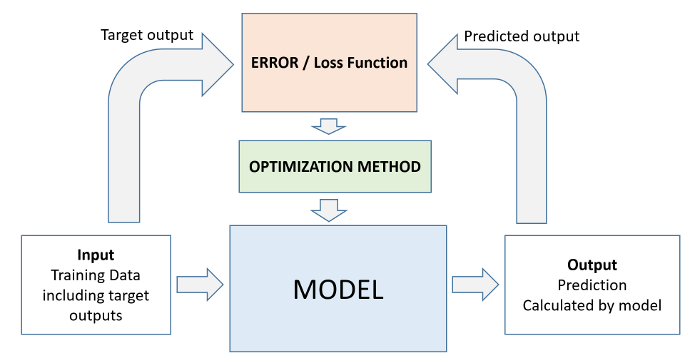

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix


Model 1: LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
model1_1 = LogisticRegression()
model1_2 = LogisticRegression()
model1_3= LogisticRegression()

model1_1.fit(X_std_train, train_targets)
model1_2.fit(X_std_val, val_targets )
model1_3.fit(X_std_test, test_targets)

LogisticRegression()

In [41]:
train_preds = model1_1.predict(X_std_train)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
val_preds = model1_2.predict(X_std_val)
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
test_preds=model1_3.predict(X_std_test)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
model1_1.score(X_std_train, train_targets)

0.99920603985989

In [45]:
model1_2.score(X_std_val, val_targets)

0.9991764398942574

In [46]:
model1_3.score(X_std_test, test_targets)

0.9991795832534396

Model_2: **RandomForestClassifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 10
RF1 = RandomForestClassifier(n_estimators=num_trees, random_state=42)
RF2 = RandomForestClassifier(n_estimators=num_trees, random_state=42)
RF3 = RandomForestClassifier(n_estimators=num_trees, random_state=42)



In [48]:
RF1.fit(X_std_train, train_targets)
RF2.fit(X_std_val, val_targets)
RF3.fit(X_std_test, test_targets)

RandomForestClassifier(n_estimators=10, random_state=42)

In [49]:
RF1.score(X_std_train, train_targets)

0.9999518018258726

In [50]:
RF2.score(X_std_val, val_targets)

0.9999481345734933

In [51]:
RF3.score(X_std_test, test_targets)

0.99994341953472

In [52]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 20
model2_1_1 = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model2_2_2 = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model2_3_3 = RandomForestClassifier(n_estimators=num_trees, random_state=42)

model2_1_1.fit(X_std_train, train_targets)
model2_2_2.fit(X_std_val, val_targets)
model2_3_3.fit(X_std_test, test_targets)


RandomForestClassifier(n_estimators=20, random_state=42)

In [53]:
model2_1_1.score(X_std_train, train_targets)

0.9999814017915052

In [54]:
model2_2_2.score(X_std_val, val_targets)

0.9999693522479733

In [55]:
model2_3_3.score(X_std_val, val_targets)

0.9992180894034218

Model 3: **XGBRegresso**r

In [56]:
from xgboost import XGBRegressor

In [57]:
model4_1 = XGBRegressor(random_state=42, n_jobs=1, n_estimators=10, max_depth=4)
model4_2 = XGBRegressor(random_state=42, n_jobs=1, n_estimators=10, max_depth=4)
model4_3 = XGBRegressor(random_state=42, n_jobs=1, n_estimators=10, max_depth=4)

In [58]:
model4_1.fit(X_std_train, train_targets)
model4_2.fit(X_std_val, val_targets)
model4_3.fit(X_std_test, test_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=1,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
model4_1.score(X_std_train, train_targets)

0.6158580278259407

In [60]:
model4_2.score(X_std_val, val_targets)

0.5990429095839019

In [61]:
model4_3.score(X_std_test, test_targets)

0.6205246316722965

Hyper-parameter Tunning

In [62]:
model4_1_1 = XGBRegressor(random_state=42, n_jobs=2, n_estimators=20, max_depth=8)
model4_1_2 = XGBRegressor(random_state=42, n_jobs=2, n_estimators=20, max_depth=8)
model4_1_3 = XGBRegressor(random_state=42, n_jobs=2, n_estimators=20, max_depth=8)

model4_1_1.fit(X_std_train, train_targets)
model4_1_2.fit(X_std_val, val_targets)
model4_1_3.fit(X_std_test, test_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=2,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
model4_1_1.score(X_std_train, train_targets)

0.820566096389809

In [64]:
model4_1_2.score(X_std_val, val_targets)

0.8120600854202626

In [65]:
model4_1_3.score(X_std_test, test_targets)

0.8335457314440347

In [66]:
model4_2_1 = XGBRegressor(random_state=42, n_jobs=4, n_estimators=40, max_depth=20)
model4_2_2 = XGBRegressor(random_state=42, n_jobs=4, n_estimators=40, max_depth=20)
model4_2_3 = XGBRegressor(random_state=42, n_jobs=4, n_estimators=20, max_depth=20)

model4_2_1.fit(X_std_train, train_targets)
model4_2_2.fit(X_std_val, val_targets)
model4_2_3.fit(X_std_test, test_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=4,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
model4_2_1.score(X_std_train, train_targets)

0.9998982723567934

In [68]:
model4_2_2.score(X_std_val, val_targets)

0.999854985467758

In [69]:
model4_2_3.score(X_std_test, test_targets)

0.9993253239379978